<h1><center>DATA201 ASSIGNMENT 2</center></h1>

ALZEN PUNIO 11224000<br>
HANBYEOL YANG 14868742

In [1]:
# Load packages such as ggplot2, dplyr, tidyr, and readr to be able to use specialised functions for creating 
# visualisations, reading, writing, and manipulating data.
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(magrittr) # To be able to use the pipe operator.
library(purrr) # To be able to use the family of map function.
library(glue) # To be able to concatenate variable to the placeholder where it is specified.
library(stringr) # For string manipulations.


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [3]:
library(rvest) # To be able to use functions for web scraping.
library(polite) # To be able to use functions that facilitates responsible web scraping.
library(xml2) # For parsing xml file.
library(repr) # For adjusting the size of the visualisations.


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [4]:
library(httr) # To be able to use functions for dealing with API, URL, and HTTP. 
library(jsonlite) # To be able to use functions when working with files in JSON format.


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




<h2>TASK (A) SCRAPE IT</h2>

In [5]:
# URL of Games of All Time from metacritic.
url <- "https://www.metacritic.com/browse/games/score/metascore/all/all/filtered"

In [6]:
# Asking for permission to scrape the metacritic site.
session <- url %>% 
    bow()
session

<polite session> https://www.metacritic.com/browse/games/score/metascore/all/all/filtered
    User-agent: polite R package
    robots.txt: 7 rules are defined for 1 bots
   Crawl delay: 5 sec
  The path is scrapable for this user-agent

Make an introduction to the metacritic and ask to scrape their website.

In [7]:
# Read and print the content of metacritic's Games of All Time page.
games <- url %>% 
  read_html()
games

{html_document}
<html xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://ogp.me/ns/fb#">
[1] <head>\n<title>Best Video Games of All Time - Metacritic</title>\n<meta h ...
[2] <body class="skybox-auto-collapse">\n\n     \n    <div id="nav_ad_wrapper ...

We take a web page from metacritic and use `read_html()` to read its content. We then save it as **games** to be able to use it throughout the tasks.

In [8]:
# Finds all the h3 element under the .title class which is under .clamp-summary-wrap class.
# Then extract the raw text inside the h3 element. Assign the result as titles.
titles <- games %>% 
  html_nodes(".clamp-summary-wrap > .title > h3") %>% 
  html_text()
titles %>% 
    head()

[1] "The Legend of Zelda: Ocarina of Time"
[2] "Tony Hawk's Pro Skater 2"            
[3] "Grand Theft Auto IV"                 
[4] "SoulCalibur"                         
[5] "Grand Theft Auto IV"                 
[6] "Super Mario Galaxy"

Extracts the game titles from `h3` elements which under the elements with `title` and `clamp-summary-wrap` classes. Save the vector of characters as **titles**. 

In [9]:
# Find the a element with .title class then get the link inside the href attribute.
link <- games %>% 
  html_nodes("a.title") %>% 
  html_attr("href")
link %>% 
    head()

[1] "/game/nintendo-64/the-legend-of-zelda-ocarina-of-time"
[2] "/game/playstation/tony-hawks-pro-skater-2"            
[3] "/game/playstation-3/grand-theft-auto-iv"              
[4] "/game/dreamcast/soulcalibur"                          
[5] "/game/xbox-360/grand-theft-auto-iv"                   
[6] "/game/wii/super-mario-galaxy"

Extracts the links of game titles from `a` elements with `title` class. Save the vector of characters as **link**. 

In [10]:
# Finds the element inside .platform class having .data class. Then extract the raw text inside that element. 
# Assign the result as platform. 
game_platform <- games %>% 
  html_nodes(".platform > .data") %>% 
  html_text()
game_platform %>% 
    head()

[1] "\n                                        Nintendo 64\n                                                                            "  
[2] "\n                                        PlayStation\n                                                                            "  
[3] "\n                                        PlayStation 3\n                                                                            "
[4] "\n                                        Dreamcast\n                                                                            "    
[5] "\n                                        Xbox 360\n                                                                            "     
[6] "\n                                        Wii\n                                                                            "

Extracts the gaming platforms from elements with `data` class under the parent elements with `platform` class. Save the vector of characters as **game_platform**. 

In [11]:
# Finds all of the span element inside .clamp-details class and extract the contained raw text from it. 
# Assign the result as release_date.
release_date <- games %>% 
  html_nodes(".clamp-details > span") %>% 
  html_text()
release_date %>% 
    head()

[1] "November 23, 1998"  "September 20, 2000" "April 29, 2008"    
[4] "September 8, 1999"  "April 29, 2008"     "November 12, 2007"

Extracts the release dates from `span` elements class under the parent elements with `clamp-details` class. Save the vector of characters as **release_date**. 

In [12]:
# Takes the element with class .summary then extract the text inside of it. Save th result as game_descr.
description <- games %>% 
  html_nodes(".summary") %>% 
  html_text()
description %>% 
    head()

[1] "\n                        As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.\n                        "                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
[2] "\n                        As most major publishers' development efforts shift to any number of next-generation platforms, Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation.\n                        "                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
[3] "\n                        [Metacritic's 2008 PS3 Game of the Year; Also known as \"GTA IV\"]  What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It's the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don't. [Rockstar Games]\n                        "                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
[4] "\n                        This is a tale of souls and swords, transcending the world and all its history, told for all eternity... The greatest weapons-based fighter returns, this time on Sega Dreamcast. Soul Calibur unleashes incredible graphics, fantastic fighters, and combos so amazing they'll make your head spin!\n                        "                          

Extracts the game descriptions from elements with `summary` class. Save the vector of characters as **description**. 

In [13]:
# Finds the div element inside a element under the element having .clamp-metascore as class and extract the text inside.
# Save the result as meta_score.
meta_score <- games %>% 
  html_nodes(".clamp-metascore > a > div") %>% 
  html_text() %>% 
  as.double()
meta_score %>% 
    head()

[1] 99 98 98 98 98 97

Extracts the meta scores from `div` elements which under the `a` elements and elements with `clamp-metascore` class. Converted the values as double and save the vector of doubles as **meta_score**. 

In [14]:
# Finds the div element inside a element under the element having .clamp-usercore as class and extract the text inside.
# Save the result as user_score.
user_score <- games %>% 
  html_nodes(".clamp-userscore > a > div") %>% 
  html_text() %>% 
  as.double()
user_score %>% 
    head()

[1] 9.1 7.4 7.8 8.4 7.9 9.1

Extracts the user scores from `div` elements which under the `a` elements and elements with `clamp-userscore` class. Converted the values as double and then save the vector of doubles as **user_score**. 

By scraping the **Games of all Time** page in **metacritic** using `html class`, `html element`, and scraping related functions from the packages above, we acquired the raw information about the games listed in the page such as game titles, their links, gaming platforms they are available on, its release dates, game descriptions, the meta and user score. 

<h2>TASK (B) WRANGLE IT</h2>

In [15]:
# Creates a data frame containing the scraped data from Games of All Time page.
# It is stored as all_games_df.
all_games <- tibble(title = titles,
                    release_date = as.Date(release_date, format = "%B %d, %Y"),
                    game_descr = description %>% str_replace_all("[^[:alnum:]]", " ") %>% trimws("both"))
all_games %>% head()

title,release_date,game_descr
<chr>,<date>,<chr>
The Legend of Zelda: Ocarina of Time,1998-11-23,As a young boy Link is tricked by Ganondorf the King of the Gerudo Thieves The evil human uses Link to gain access to the Sacred Realm where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland Link is determined to fix the problems he helped to create so with the help of Rauru he travels through time gathering the powers of the Seven Sages
Tony Hawk's Pro Skater 2,2000-09-20,As most major publishers development efforts shift to any number of next generation platforms Tony Hawk 2 will likely stand as one of the last truly fantastic games to be released on the PlayStation
Grand Theft Auto IV,2008-04-29,Metacritic s 2008 PS3 Game of the Year Also known as GTA IV What does the American Dream mean today For Niko Belic fresh off the boat from Europe It s the hope he can escape his past For his cousin Roman it is the vision that together they can find fortune in Liberty City gateway to the land of opportunity As they slip into debt and are dragged into a criminal underworld by a series of shysters thieves and sociopaths they discover that the reality is very different from the dream in a city that worships money and status and is heaven for those who have them an a living nightmare for those who don t Rockstar Games
SoulCalibur,1999-09-08,This is a tale of souls and swords transcending the world and all its history told for all eternity The greatest weapons based fighter returns this time on Sega Dreamcast Soul Calibur unleashes incredible graphics fantastic fighters and combos so amazing they ll make your head spin
Grand Theft Auto IV,2008-04-29,Metacritic s 2008 Xbox 360 Game of the Year Also known as GTA IV What does the American Dream mean today For Niko Belic fresh off the boat from Europe It s the hope he can escape his past For his cousin Roman it is the vision that together they can find fortune in Liberty City gateway to the land of opportunity As they slip into debt and are dragged into a criminal underworld by a series of shysters thieves and sociopaths they discover that the reality is very different from the dream in a city that worships money and status and is heaven for those who have them an a living nightmare for those who don t Rockstar Games
Super Mario Galaxy,2007-11-12,Metacritic s 2007 Wii Game of the Year The ultimate Nintendo hero is taking the ultimate step out into space Join Mario as he ushers in a new era of video games defying gravity across all the planets in the galaxy When some creature escapes into space with Princess Peach Mario gives chase exploring bizarre planets all across the galaxy Mario Peach and enemies new and old are here Players run jump and battle enemies as they explore all the planets in the galaxy Since this game makes full use of all the features of the Wii Remote players have to do all kinds of things to succeed pressing buttons swinging the Wii Remote and the Nunchuk and even pointing at and dragging things with the pointer Since he s in space Mario can perform mind bending jumps unlike anything he s done before He ll also have a wealth of new moves that are all based around tilting pointing and shaking the Wii Remote Shake tilt and point Mario takes advantage of all the unique aspects of the Wii Remote and Nunchuk controller unleashing new moves as players shake the controller and even point at and drag items with the pointer Nintendo


In [16]:
# Creates a data frame containing the gaming platforms scraped from Games
# of All Time page. Save it as platforms.
platforms <- tibble(platform_name = game_platform %>%
                    str_replace_all("[^[:alnum:]]", " ") %>% 
                    trimws("both"))
platforms %>% 
    distinct()

platform_name
<chr>
Nintendo 64
PlayStation
PlayStation 3
Dreamcast
Xbox 360
Wii
Xbox One
PC
Switch


In [17]:
# Creates a data frame containing the meta score and user score.
# It is stored as all_games_scores.
all_games_scores <- tibble(title = titles,
                           platform_name = game_platform %>%
                                       str_replace_all("[^[:alnum:]]", " ") %>% 
                                       trimws("both"),
                          meta_score = meta_score,
                          user_score)
all_games_scores %>% 
    head()

title,platform_name,meta_score,user_score
<chr>,<chr>,<dbl>,<dbl>
The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1
Tony Hawk's Pro Skater 2,PlayStation,98,7.4
Grand Theft Auto IV,PlayStation 3,98,7.8
SoulCalibur,Dreamcast,98,8.4
Grand Theft Auto IV,Xbox 360,98,7.9
Super Mario Galaxy,Wii,97,9.1


> The created **all_games** data frame contains information about each game such as game title, platform name, release date, and description. The **all_games_scores** contains the `meta_score` and `user_score`. We converted the release date into `date` type and we also manipulated the platform name and description by removing special characters and whitespaces.

> The **all_games** relates to **all_games_scores** through `title` and **platforms** relate to **all_games_scores** through `platform_name`. This allows to uniquely identify the scores for specific game having multiple platform.

<h2>TASK (C) AUTOMATE IT</h2>

In [18]:
# Helper function to to read in the content of the web page.
read_page_content <- function(link) {
  web_page_content <- link %>% 
    read_html()
  
  return(web_page_content)
}

In [19]:
# Helper function for cleaning the raw text (replacing special characters and trimming the whitespaces on both sides).
clean_text <- function(raw_data) {
  clean_data <- raw_data %>% 
    str_replace_all("[^[:alnum:]]", " ") %>% 
    trimws("both")
  
  return(clean_data)
}

# Helper function to convert character date to actual date type.
convert_date <- function(chr_date) {
  converted_date <- as.Date(chr_date, format = "%B %d, %Y")
  
  return(converted_date)
}

In [20]:
# Helper function to get the title of the games.
get_title <- function(data) {
  title <- data %>%
    html_nodes(".clamp-summary-wrap > .title > h3") %>% 
    html_text()
  
  return(title)
}

# Helper function to get the release date of the games.
get_date <- function(data) {
  date <- data %>%
    html_nodes(".clamp-details > span") %>% 
    html_text()
  
  return(date)
}

# Helper function to get the platform the game is on.
get_platform <- function(data) {
  platform <- data %>%
    html_nodes(".platform > .data") %>% 
    html_text()
  
  return(platform)
}

In [21]:
# Helper function to get the description of the games.
get_description <- function(data) {
  description <- data %>%
    html_nodes(".summary") %>% 
    html_text()
  
  return(description)
}

# Helper function to get the meta and user scores of the games. Apply the as.double() function to each every row in
# the vector of characters. Suppress the warnings due to conversion for the user scores.
get_scores <- function(data) {
  ms <- data %>%
    html_nodes(".clamp-metascore > a > div") %>% 
    html_text()
  
  us <- data %>%
    html_nodes(".clamp-userscore > a > div") %>% 
    html_text()
    
  return(tibble(ms = map_dbl(ms, as.double), 
                us = suppressWarnings(map_dbl(us, as.double))))
}

In [22]:
# Data frame of links of the web pages we are interested in
pages <- tibble(links = c("https://www.metacritic.com/browse/games/score/metascore/year/all/filtered", 
                          "https://www.metacritic.com/browse/games/score/metascore/90day/all/filtered"))

# Apply the read_page_content to all of the links in the data frame.
# Modify the links variable to take the content of the html file of the games this year web page.
pages <- pages %>% 
  mutate(links = map(links, read_page_content))

Created a data frame containing the links to other web pages and then we replaced the links with their web page content. 

<h3>Games This Year</h3>

In [23]:
# Take the content of the html file of the games this year web page.
game_scores <- pages[[1]][[1]] %>% get_scores()
# Create a data frame with all of the information about the first 100 games listed under
# games this year web page.
games_this_year <- tibble(title = pages[[1]][[1]] %>% get_title(),
                          release_date = pages[[1]][[1]] %>% get_date(),
                          platform_name = pages[[1]][[1]] %>% get_platform(),
                          game_descr = pages[[1]][[1]] %>% get_description(),
                          meta_score = game_scores$ms,
                          user_score = game_scores$us)

# Modify the release_date by converting it to date type.
# Modify the game_description and platform_name by removing special characters and whitespaces.
games_this_year <- games_this_year %>% 
  mutate(release_date = release_date %>%
                        convert_date,
         game_descr = map_chr(game_descr, clean_text),
         platform_name = map_chr(platform_name, clean_text))



games_this_year %>% 
   head()

title,release_date,platform_name,game_descr,meta_score,user_score
<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>
Elden Ring,2022-02-25,Xbox Series X,A New World Created By Hidetaka Miyazaki And George R R Martin ELDEN RING developed by FromSoftware Inc and BANDAI NAMCO Entertainment Inc is a fantasy action RPG adventure set within a world created by Hidetaka Miyazaki creator of the influential DARK SOULS video game series and George R R Martin author of The New York Times best selling fantasy series A Song of Ice and Fire Danger and discovery lurk around every corner in FromSoftware s largest game to date Hidetaka Miyazaki President and Game Director of FromSoftware Inc Known for directing critically acclaimed games in beloved franchises including Armored Core Dark Souls and Sekiro Shadows Die Twice George R R Martin is the 1 New York Times bestselling author of many novels including the acclaimed series A Song of Ice and Fire A Game of Thrones A Clash of Kings A Storm of Swords A Feast For Crows and A Dance with Dragons As a writer producer he has worked on The Twilight Zone Beauty and the Beast and various feature films and pilots that were never made,96,7.7
Elden Ring,2022-02-25,PlayStation 5,A New World Created By Hidetaka Miyazaki And George R R Martin ELDEN RING developed by FromSoftware Inc and BANDAI NAMCO Entertainment Inc is a fantasy action RPG adventure set within a world created by Hidetaka Miyazaki creator of the influential DARK SOULS video game series and George R R Martin author of The New York Times best selling fantasy series A Song of Ice and Fire Danger and discovery lurk around every corner in FromSoftware s largest game to date Hidetaka Miyazaki President and Game Director of FromSoftware Inc Known for directing critically acclaimed games in beloved franchises including Armored Core Dark Souls and Sekiro Shadows Die Twice George R R Martin is the 1 New York Times bestselling author of many novels including the acclaimed series A Song of Ice and Fire A Game of Thrones A Clash of Kings A Storm of Swords A Feast For Crows and A Dance with Dragons As a writer producer he has worked on The Twilight Zone Beauty and the Beast and various feature films and pilots that were never made,96,7.9
Portal Companion Collection,2022-06-28,Switch,Including Portal and Portal 2 the Companion Collection comes to Nintendo Switch with all the groundbreaking gameplay dark humor and exploration that earned the series hundreds of awards In Portal you ll use a highly experimental portal device to solve physical puzzles and challenges Maneuver objects and yourself through space to puzzle your way through the mysterious Aperture Science Laboratories Return to Aperture Laboratories in Portal 2 where you ll once again face off with the lethally inventive power mad A I named GLaDOS Meet an expanded cast of characters as you think your way through dangerous never before seen areas of the laboratories and a wider variety of portal puzzles Plus Portal 2 also includes a co operative game mode with local split screen and online multiplayer so you and a friend can think with portals,96,8.3
Elden Ring,2022-02-25,PC,A New World Created By Hidetaka Miyazaki And George R R Martin ELDEN RING developed by FromSoftware Inc and BANDAI NAMCO Entertainment Inc is a fantasy action RPG adventure set within a world created by Hidetaka Miyazaki creator of the influential DARK SOULS video game series and George R R Martin author of The New York Times best selling fantasy series A Song of Ice and Fire Danger and discovery lurk around every corner in FromSoftware s largest game to date Hidetaka Miyazaki President and Game Director of FromSoftware Inc Known for directing critically acclaimed games in beloved franchises including Armored Core Dark Souls and Sekiro Shadows Die Twice George R R Martin is the 1 New York Times bestselling author of many novels including the acclaimed series A Song of Ice and Fire A Game of Thrones A Clash of Kings A Storm of Swords A Feast F

<h3>New Games</h3>

In [24]:
# Take the content of the html file of the new games page.
game_scores <- pages[[1]][[2]] %>% get_scores()

# Create a data frame with all of the information about the first 100 games listed under
# new games web page.
new_games <- tibble(title = pages[[1]][[2]] %>% get_title(),
                          release_date = pages[[1]][[2]] %>% get_date(),
                          platform_name = pages[[1]][[2]] %>% get_platform(),
                          game_descr = pages[[1]][[2]] %>% get_description(),
                          meta_score = game_scores$ms,
                          user_score = game_scores$us)

# Modify the release_date by converting it to date type.
# Modify the game_description and platform_name by removing special characters and whitespaces.
new_games <- new_games %>% 
  mutate(release_date = release_date %>% 
                        convert_date(),
         game_descr = map_chr(game_descr, clean_text),
         platform_name = map_chr(platform_name, clean_text))

new_games %>% 
    head()

title,release_date,platform_name,game_descr,meta_score,user_score
<chr>,<date>,<chr>,<chr>,<dbl>,<dbl>
The Legend of Heroes: Trails from Zero,2022-09-27,PC,The Crossbell State located in western Zemlya Once the site of fierce territorial battles it has since developed into one of the continent s leading trade and financial centers However pressure from the Erebonian Empire and the Calvard Republic is steadily increasing While corrupt officials from both sides remain locked in political disputes the mafia and underground criminal organizations are preparing to start a war In the midst of all this chaos the Crossbell Police Department has lost the trust of its people Among them are Lloyd Bannings a rookie agent Elie MacDowell granddaughter of Crossbell s mayor Tio Plato a young sorcereress who wields an orbal staff and Randy Orlando a former security guard The foursome are assigned to a new department the Special Support Section where they are left with no choice but to join forces in the face of adversity This is a story about four unlikely heroes fighting to overcome the walls defining their way of life,90,8.4
Xenoblade Chronicles 3,2022-07-29,Switch,Fighting to liveand living to fight A brand new RPG adventure awaits in Xenoblade Chronicles 3 Bringing together the futures of Xenoblade Chronicles and Xenoblade Chronicles 2 this title will take players to the world of Aionios home to two hostile nations Keves a nation where mechanical technology was developed Their armies are composed of units consisting mainly of combat vehicles They use units of small mobile weapons operated by soldiers riding them Agnus a nation strong in ether a magical technology Their forces are built around units that specialise in ether combat and they fight with small mobile autonomous weapons that use ether technology Six soldiers hailing from these nations will take part in a grand tale with life as its central theme Noah One of the protagonists of Xenoblade Chronicles 3 and a solider of Keves Noah is also an off seer who mourns for soldiers who ve lost their lives on the battlefield Lanz An ally of Noah s who wields a great sword that doubles as a shield Eunie A childhood friend of Noah and Lanz who has a sharp tongue and rough personality She specialises in healing her allies in battle Mio The other protagonist of this story Mio is a soldier of Agnus and an off seer like Noah Taion A tactician who fights alongside Mio using his smarts and insight Sena This soldier is an ally of Mio and Taion Despite her petite figure Sena wields immense physical strength,89,8.6
Deathloop,2022-09-20,Xbox Series X,If at first you don t succeed Die Die Again From the team at Arkane Lyon comes an innovative take on first person action DEATHLOOP transports players to the lawless island of Blackreef in an eternal struggle between two extraordinary assassins Explore stunning environments and meticulously designed levels in an immersive gameplay experience that lets you approach every situation any way you like Hunt down targets all over the island in an effort to put an end to the cycle once and for all and remember if at first you don t succeed die die again,89,6.9
The Last of Us Part I,2022-09-02,PlayStation 5,In a ravaged civilization where infected and hardened survivors run rampant Joel a weary protagonist is hired to smuggle 14 year old Ellie out of a military quarantine zone However what starts as a small job soon transforms into a brutal cross country journey Includes the complete The Last of Us single player story and celebrated prequel chapter Left Behind which explores the events that changed the lives of Ellie and her best friend Riley forever,89,6.0
I Was a Teenage Exocolonist,2022-08-25,PC,Spend your teenage years on an alien planet in this narrative RPG with card based battles Explore grow up and fall in love The choices you make and skills you master over ten years will determine the course of your life and the survival of your colony,89,8.5
NieR: Automata

In [25]:
# Creates a data frame containing the title of the game, release date, and description.
# Then displays the first six rows.
new_video_games <- tibble(game_title = new_games$title,
           release_date = new_games$release_date,
           description = new_games$game_descr)

new_video_games %>% 
    head()

game_title,release_date,description
<chr>,<date>,<chr>
The Legend of Heroes: Trails from Zero,2022-09-27,The Crossbell State located in western Zemlya Once the site of fierce territorial battles it has since developed into one of the continent s leading trade and financial centers However pressure from the Erebonian Empire and the Calvard Republic is steadily increasing While corrupt officials from both sides remain locked in political disputes the mafia and underground criminal organizations are preparing to start a war In the midst of all this chaos the Crossbell Police Department has lost the trust of its people Among them are Lloyd Bannings a rookie agent Elie MacDowell granddaughter of Crossbell s mayor Tio Plato a young sorcereress who wields an orbal staff and Randy Orlando a former security guard The foursome are assigned to a new department the Special Support Section where they are left with no choice but to join forces in the face of adversity This is a story about four unlikely heroes fighting to overcome the walls defining their way of life
Xenoblade Chronicles 3,2022-07-29,Fighting to liveand living to fight A brand new RPG adventure awaits in Xenoblade Chronicles 3 Bringing together the futures of Xenoblade Chronicles and Xenoblade Chronicles 2 this title will take players to the world of Aionios home to two hostile nations Keves a nation where mechanical technology was developed Their armies are composed of units consisting mainly of combat vehicles They use units of small mobile weapons operated by soldiers riding them Agnus a nation strong in ether a magical technology Their forces are built around units that specialise in ether combat and they fight with small mobile autonomous weapons that use ether technology Six soldiers hailing from these nations will take part in a grand tale with life as its central theme Noah One of the protagonists of Xenoblade Chronicles 3 and a solider of Keves Noah is also an off seer who mourns for soldiers who ve lost their lives on the battlefield Lanz An ally of Noah s who wields a great sword that doubles as a shield Eunie A childhood friend of Noah and Lanz who has a sharp tongue and rough personality She specialises in healing her allies in battle Mio The other protagonist of this story Mio is a soldier of Agnus and an off seer like Noah Taion A tactician who fights alongside Mio using his smarts and insight Sena This soldier is an ally of Mio and Taion Despite her petite figure Sena wields immense physical strength
Deathloop,2022-09-20,If at first you don t succeed Die Die Again From the team at Arkane Lyon comes an innovative take on first person action DEATHLOOP transports players to the lawless island of Blackreef in an eternal struggle between two extraordinary assassins Explore stunning environments and meticulously designed levels in an immersive gameplay experience that lets you approach every situation any way you like Hunt down targets all over the island in an effort to put an end to the cycle once and for all and remember if at first you don t succeed die die again
The Last of Us Part I,2022-09-02,In a ravaged civilization where infected and hardened survivors run rampant Joel a weary protagonist is hired to smuggle 14 year old Ellie out of a military quarantine zone However what starts as a small job soon transforms into a brutal cross country journey Includes the complete The Last of Us single player story and celebrated prequel chapter Left Behind which explores the events that changed the lives of Ellie and her best friend Riley forever
I Was a Teenage Exocolonist,2022-08-25,Spend your teenage years on an alien planet in this narrative RPG with card based battles Explore grow up and fall in love The choices you make and skills you master over ten years will determine the course of your life and the survival of your colony
NieR: Automata - The End of YoRHa Edition,2022-10-06,NieR Automata The End of YoRHa Edition is the Nintendo Switch version of NieR Automat

In [26]:
# Creates a data frame containing the platforms.
platforms <- tibble(game_platform = new_games$platform_name %>% 
                           unique())

platforms

game_platform
<chr>
PC
Switch
Xbox Series X
PlayStation 5
PlayStation 4
Xbox One


In [27]:
# Creates a data frame containing the title of the game, platform, critics and user scores.
# Then displays the first six rows.
scores <- tibble(game_title = new_games$title,
                 game_platform = new_games$platform_name,
                 critics_score = new_games$meta_score,
                 users_score = new_games$user_score)

scores %>% 
    head()

game_title,game_platform,critics_score,users_score
<chr>,<chr>,<dbl>,<dbl>
The Legend of Heroes: Trails from Zero,PC,90,8.4
Xenoblade Chronicles 3,Switch,89,8.6
Deathloop,Xbox Series X,89,6.9
The Last of Us Part I,PlayStation 5,89,6.0
I Was a Teenage Exocolonist,PC,89,8.5
NieR: Automata - The End of YoRHa Edition,Switch,88,7.9


We scraped the content of the two web pages by using the getter functions and applying the **cleaning** functions to some data collected that contains special characters and whitespaces.

We created relational dataset which is similar to task (b). The **new_video_games** data frame relates to **platforms** data frame through `game_platform`. The **scores** data frame relates to **new_video_games** and **platforms** data frame via `game_title` and `game_platform`.

<h2>TASK (D) PLOT IT</h2>

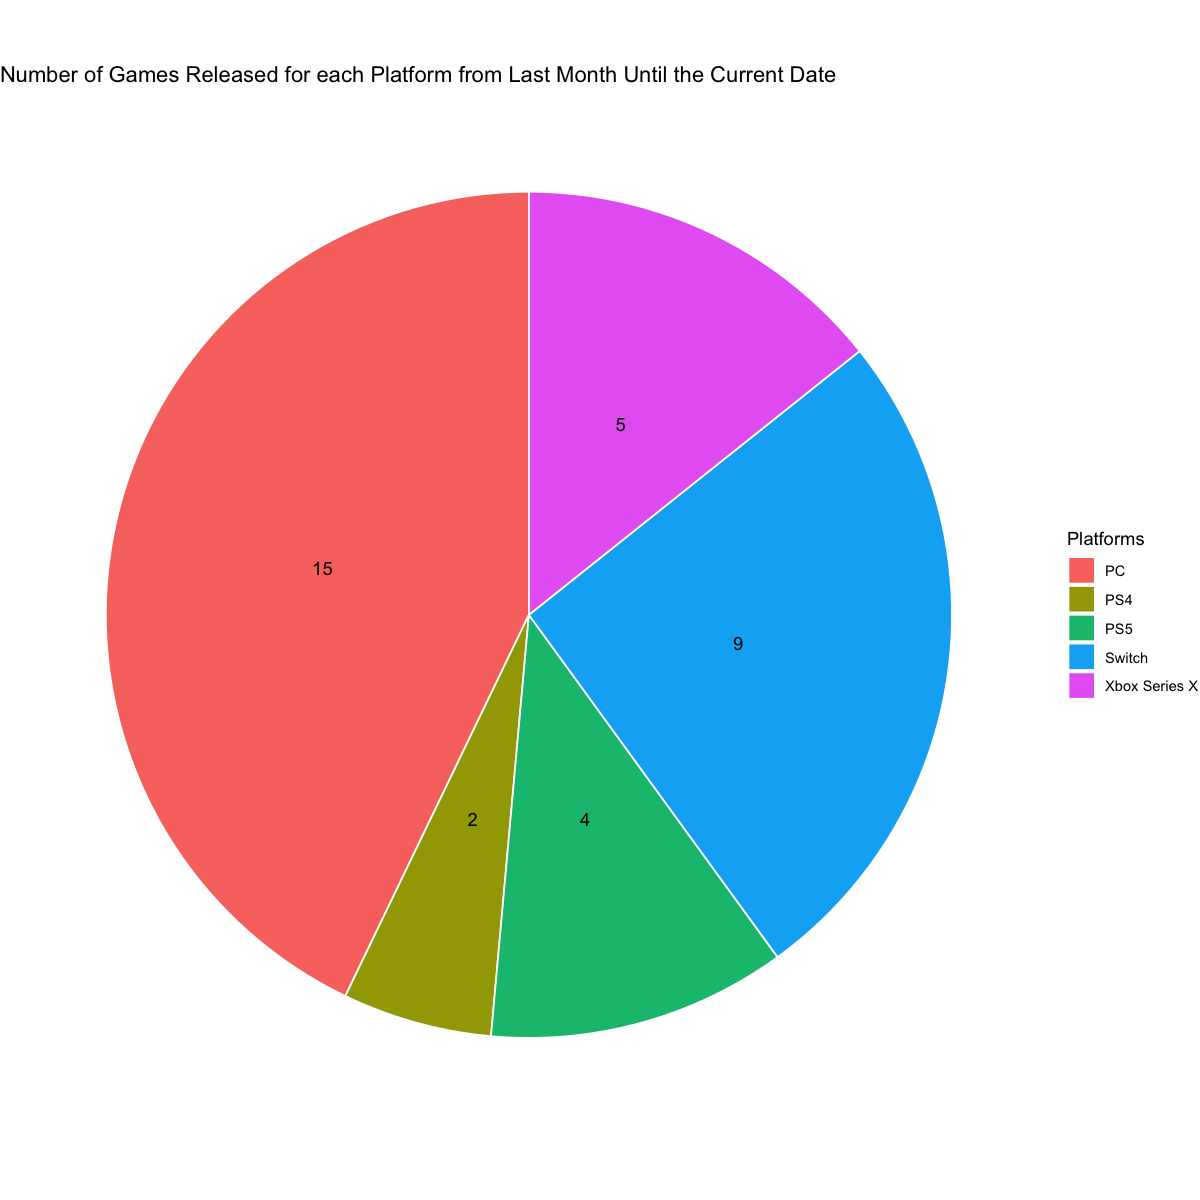

In [28]:
# A pie chart showing the number of games released per platform from last month until the current date.
options(repr.plot.width = 10, repr.plot.height = 10)
new_games %>% 
    filter(release_date >= as.Date("2022-09-01"), release_date <= Sys.Date()) %>% 
    group_by(platform_name) %>% 
    tally() %>% 
    ggplot(aes(x="", y=n, fill = platform_name)) +
    geom_bar(stat="identity", width=1, color="white") +
    coord_polar("y", start=0) +
    theme_void() +
    scale_fill_discrete(name = "Platforms", labels = c("PC", "PS4", "PS5", "Switch", "Xbox Series X")) +
    ggtitle("Number of Games Released for each Platform from Last Month Until the Current Date") +
    geom_text(aes(label = n), position = position_stack(vjust = 0.5))

We created a pie chart to see which gaming platform released games and the quantity from last month until the current date.

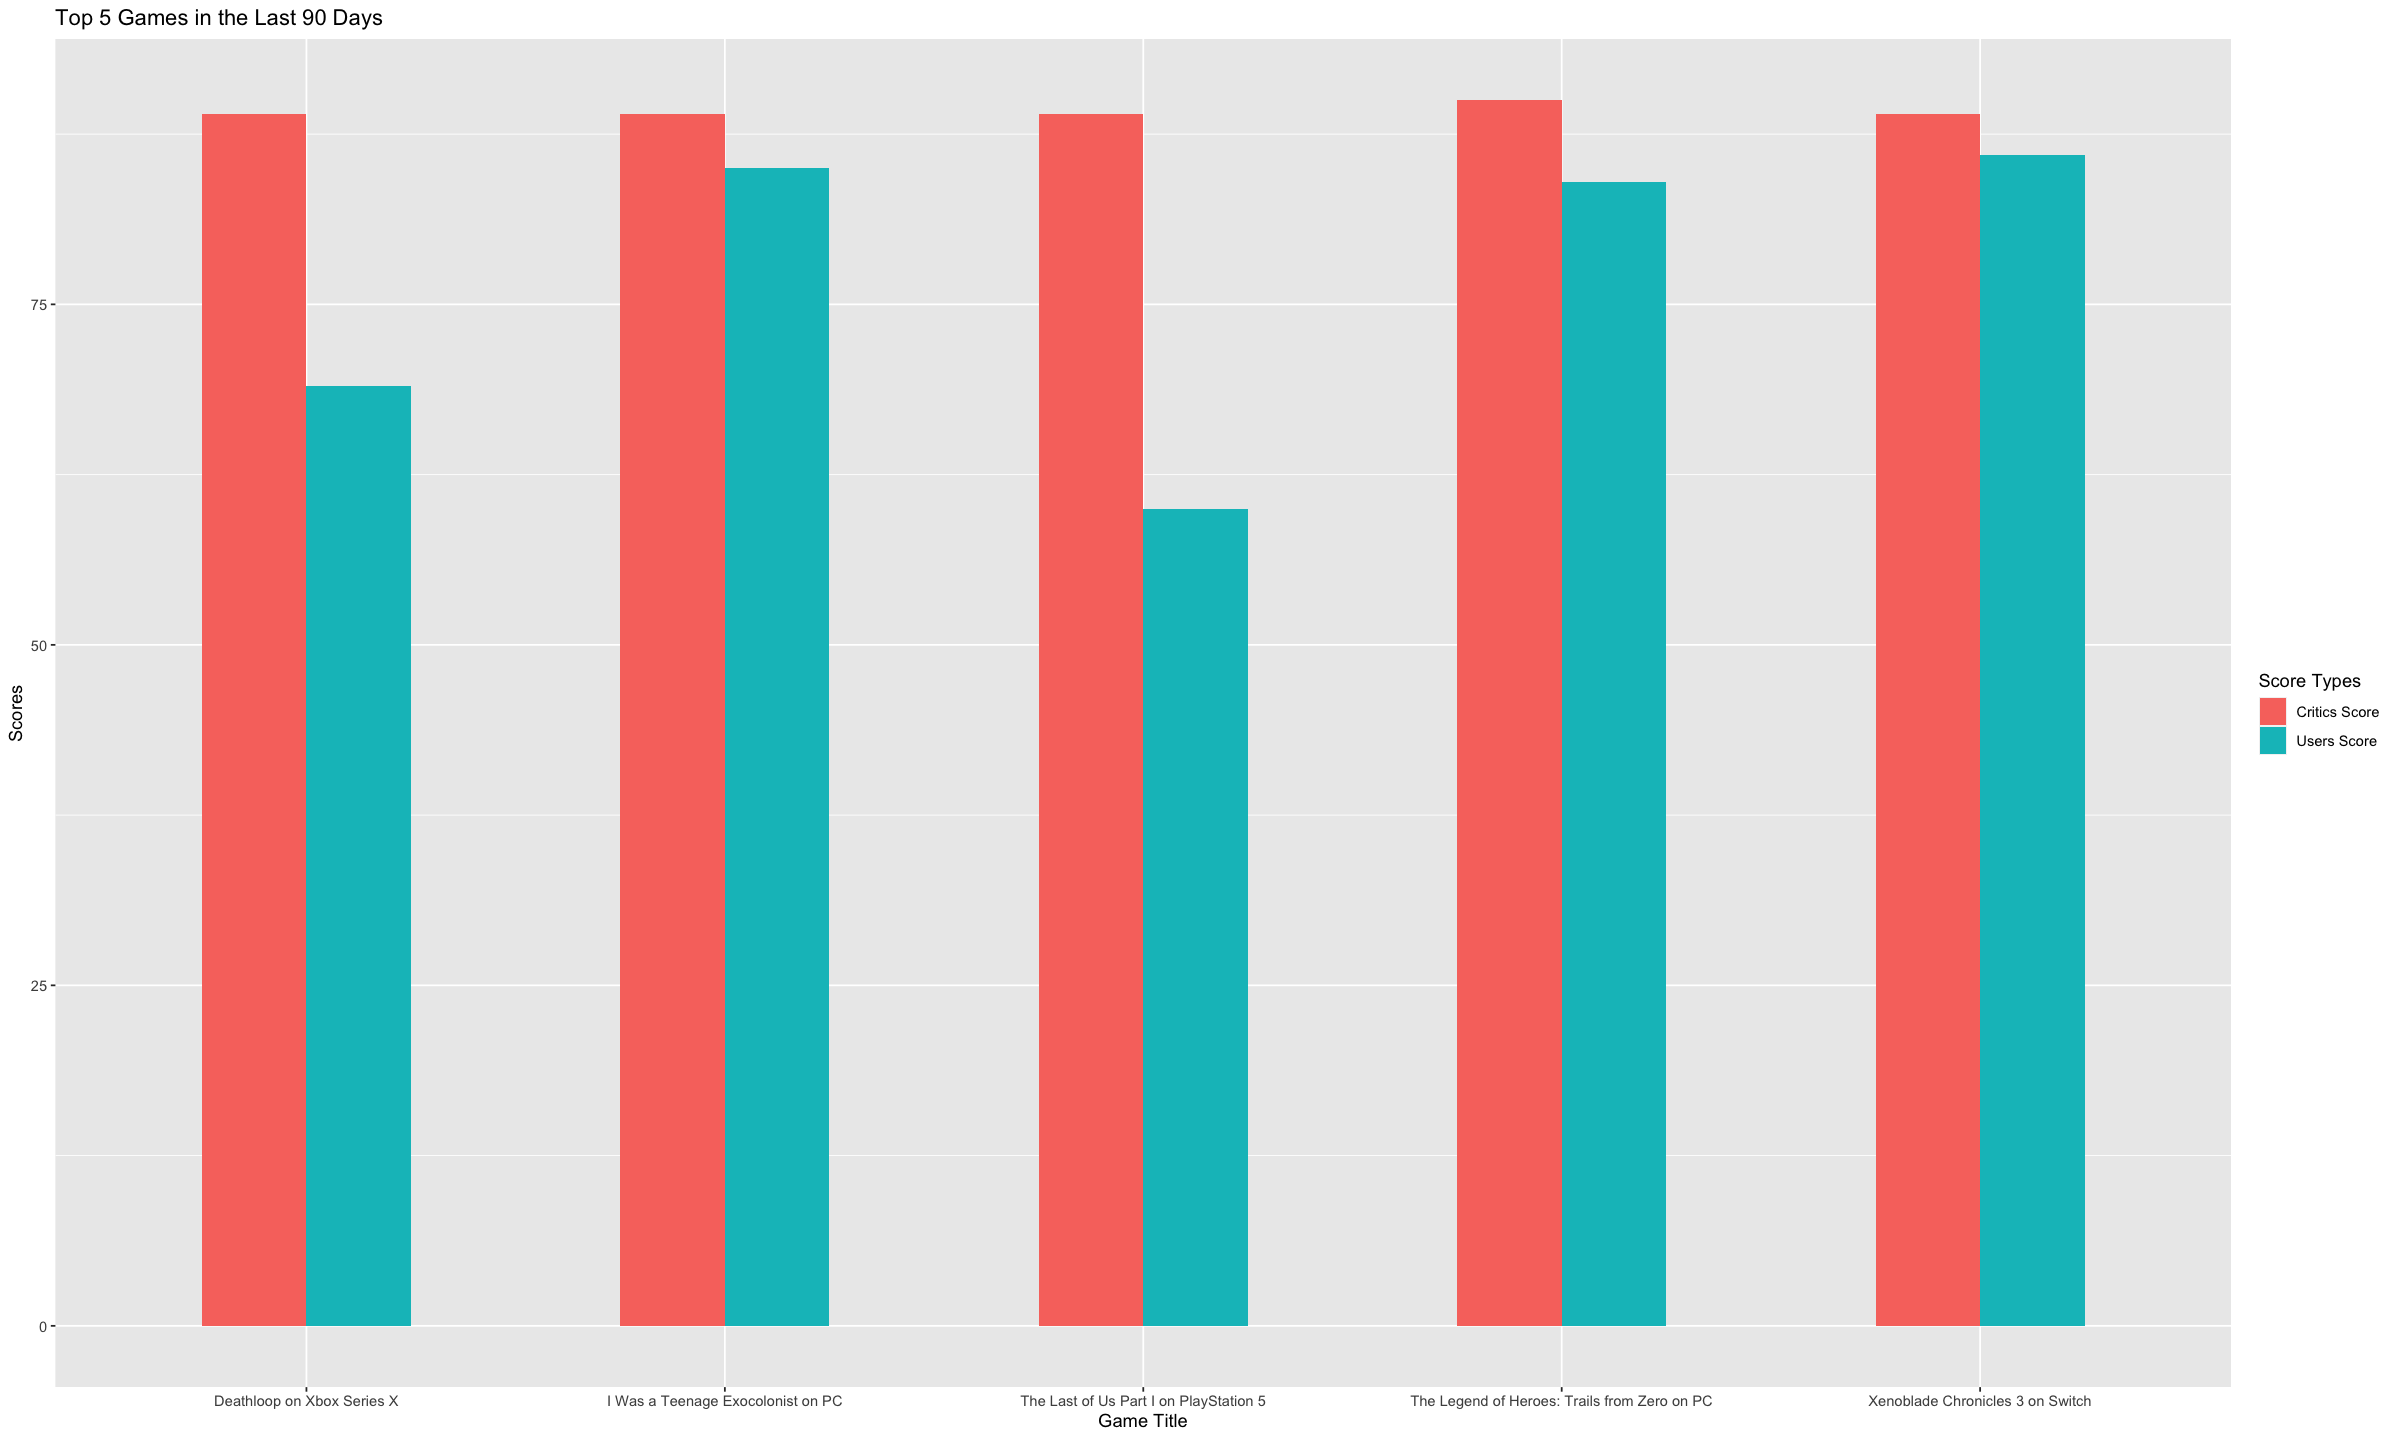

In [29]:
# A bar plot displaying top 5 games and their scores in the last 90 days. 
options(repr.plot.width = 20, repr.plot.height = 12)
new_games %>% 
  mutate(user_score = user_score * 10) %>% 
  top_n(5, meta_score) %>% 
  gather(key=score_type,
         value = score, c(meta_score, user_score)) %>% 
  ggplot(aes(x = paste(title, platform_name, sep = " on "), y= score, fill = score_type)) +
  geom_bar(stat="identity", width=.5, position = "dodge") +
  ylab("Scores") + xlab("Game Title") +
  ggtitle("Top 5 Games in the Last 90 Days") +
  scale_fill_discrete(name = "Score Types", labels = c("Critics Score", "Users Score")) 
  

We created a bar plot that compares the critics' and users' scores of the top 5 games in the last 90 days.

<h2>TASK (E) APIs</h2>

In [30]:
# The endpoint to access the list of public APIs.
# The url with a placeholder for meme_endpoint.
ap_endpoint <- "/entries"
ap_url_placeholder <- "https://api.publicapis.org{ap_endpoint}"

In [31]:
# Creates the whole url to access the entries of public APIs.
ap_url <- glue(ap_url_placeholder)
ap_url

https://api.publicapis.org/entries

Combines the base URL with the endpoint to create a full link leading to the resource.

In [32]:
# Request and gets the an array of information about the public APIs. 
# Displays the response object.
ap <- GET(ap_url)
ap

Response [https://api.publicapis.org/entries]
  Date: 2022-10-10 22:59
  Status: 200
  Content-Type: application/json
  Size: 281 kB
{"count":1425,"entries":[{"API":"AdoptAPet","Description":"Resource to help g...

Get the entries of public APIs under the **/entries** endpoint. The result is a response containing the data in JSON format in the body. The header includes the following:
<ul>
    <li>The retrieved date.</li>
    <li>The status code indicating if the request is successful.</li>
    <li>The content type.</li>
    <li>The content size.</li>
</ul>

In [33]:
# Access the content of the request body.
# Displays the raw data inside the request body.
ap_content <- ap %>% 
    content("text", encoding = "UTF-8")
ap_content

[1] "{\"count\":1425,\"entries\":[{\"API\":\"AdoptAPet\",\"Description\":\"Resource to help get pets adopted\",\"Auth\":\"apiKey\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://www.adoptapet.com/public/apis/pet_list.html\",\"Category\":\"Animals\"},{\"API\":\"Axolotl\",\"Description\":\"Collection of axolotl pictures and facts\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"no\",\"Link\":\"https://theaxolotlapi.netlify.app/\",\"Category\":\"Animals\"},{\"API\":\"Cat Facts\",\"Description\":\"Daily cat facts\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"no\",\"Link\":\"https://alexwohlbruck.github.io/cat-facts/\",\"Category\":\"Animals\"},{\"API\":\"Cataas\",\"Description\":\"Cat as a service (cats pictures and gifs)\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"no\",\"Link\":\"https://cataas.com/\",\"Category\":\"Animals\"},{\"API\":\"Cats\",\"Description\":\"Pictures of cats from Tumblr\",\"Auth\":\"apiKey\",\"HTTPS\":true,\"Cors\":\"no\",\"Link\":\"https://docs.thecatapi.com/\",\"Category\":\"Animals\"},{\"API\":\"Dog Facts\",\"Description\":\"Random dog facts\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://dukengn.github.io/Dog-facts-API/\",\"Category\":\"Animals\"},{\"API\":\"Dog Facts\",\"Description\":\"Random facts of Dogs\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://kinduff.github.io/dog-api/\",\"Category\":\"Animals\"},{\"API\":\"Dogs\",\"Description\":\"Based on the Stanford Dogs Dataset\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://dog.ceo/dog-api/\",\"Category\":\"Animals\"},{\"API\":\"eBird\",\"Description\":\"Retrieve recent or notable birding observations within a region\",\"Auth\":\"apiKey\",\"HTTPS\":true,\"Cors\":\"no\",\"Link\":\"https://documenter.getpostman.com/view/664302/S1ENwy59\",\"Category\":\"Animals\"},{\"API\":\"FishWatch\",\"Description\":\"Information and pictures about individual fish species\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://www.fishwatch.gov/developers\",\"Category\":\"Animals\"},{\"API\":\"HTTP Cat\",\"Description\":\"Cat for every HTTP Status\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://http.cat/\",\"Category\":\"Animals\"},{\"API\":\"HTTP Dog\",\"Description\":\"Dogs for every HTTP response status code\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://http.dog/\",\"Category\":\"Animals\"},{\"API\":\"IUCN\",\"Description\":\"IUCN Red List of Threatened Species\",\"Auth\":\"apiKey\",\"HTTPS\":false,\"Cors\":\"no\",\"Link\":\"http://apiv3.iucnredlist.org/api/v3/docs\",\"Category\":\"Animals\"},{\"API\":\"MeowFacts\",\"Description\":\"Get random cat facts\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"no\",\"Link\":\"https://github.com/wh-iterabb-it/meowfacts\",\"Category\":\"Animals\"},{\"API\":\"Movebank\",\"Description\":\"Movement and Migration data of animals\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://github.com/movebank/movebank-api-doc\",\"Category\":\"Animals\"},{\"API\":\"Petfinder\",\"Description\":\"Petfinder is dedicated to helping pets find homes, another resource to get pets adopted\",\"Auth\":\"apiKey\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://www.petfinder.com/developers/\",\"Category\":\"Animals\"},{\"API\":\"PlaceBear\",\"Description\":\"Placeholder bear pictures\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://placebear.com/\",\"Category\":\"Animals\"},{\"API\":\"PlaceDog\",\"Description\":\"Placeholder Dog pictures\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://place.dog\",\"Category\":\"Animals\"},{\"API\":\"PlaceKitten\",\"Description\":\"Placeholder Kitten pictures\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://placekitten.com/\",\"Category\":\"Animals\"},{\"API\":\"RandomDog\",\"Description\":\"Random pictures of dogs\",\"Auth\":\"\",\"HTTPS\":true,\"Cors\":\"yes\",\"Link\":\"https://random.dog/woof.json\",\"Category\":\"Animals\"},{\"API\":\"RandomDuck\",\"Descr

Extract the content of the request body in a text type or, in this case, in JSON type. 

In [34]:
# Converts the ap_content from JSON to R object.
# Displays a data frame containing information about each public APIs in the list.
ap_data <- ap_content %>% 
    fromJSON()
ap_data %>% 
    head()

,API,Description,Auth,HTTPS,Cors,Link,Category
,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,AdoptAPet,Resource to help get pets adopted,apiKey,TRUE,yes,https://www.adoptapet.com/public/apis/pet_list.html,Animals
2,Axolotl,Collection of axolotl pictures and facts,,TRUE,no,https://theaxolotlapi.netlify.app/,Animals
3,Cat Facts,Daily cat facts,,TRUE,no,https://alexwohlbruck.github.io/cat-facts/,Animals
4,Cataas,Cat as a service (cats pictures and gifs),,TRUE,no,https://cataas.com/,Animals
5,Cats,Pictures of cats from Tumblr,apiKey,TRUE,no,https://docs.thecatapi.com/,Animals
6,Dog Facts,Random dog facts,,TRUE,yes,https://dukengn.github.io/Dog-facts-API/,Animals
7,Dog Facts,Random facts of Dogs,,TRUE,yes,https://kinduff.github.io/dog-api/,Animals
8,Dogs,Based on the Stanford Dogs Dataset,,TRUE,yes,https://dog.ceo/dog-api/,Animals
9,eBird,Retrieve recent or notable birding observations within a region,apiKey,TRUE,no,https://documenter.getpostman.com/view/664302/S1ENwy59,Animals


We converted the content of the request body, which is in **JSON** format, to an R object to easily access the data inside of it. 

In [35]:
# Creates a data frame of entries about government public APIs.
gov_ap <- data.frame(ap_data[2]) %>% 
    filter(entries.Category == "Government")
gov_ap

entries.API,entries.Description,entries.Auth,entries.HTTPS,entries.Cors,entries.Link,entries.Category
<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
Bank Negara Malaysia Open Data,Malaysia Central Bank Open Data,,TRUE,unknown,https://apikijangportal.bnm.gov.my/,Government
BCLaws,Access to the laws of British Columbia,,FALSE,unknown,https://www.bclaws.gov.bc.ca/civix/template/complete/api/index.html,Government
Brazil,Community driven API for Brazil Public Data,,TRUE,yes,https://brasilapi.com.br/,Government
Brazil Central Bank Open Data,Brazil Central Bank Open Data,,TRUE,unknown,https://dadosabertos.bcb.gov.br/,Government
Brazil Receita WS,Consult companies by CNPJ for Brazilian companies,,TRUE,unknown,https://www.receitaws.com.br/,Government
Brazilian Chamber of Deputies Open Data,"Provides legislative information in Apis XML and JSON, as well as files in various formats",,TRUE,no,https://dadosabertos.camara.leg.br/swagger/api.html,Government
Census.gov,The US Census Bureau provides various APIs and data sets on demographics and businesses,,TRUE,unknown,https://www.census.gov/data/developers/data-sets.html,Government
"City, Berlin",Berlin(DE) City Open Data,,TRUE,unknown,https://daten.berlin.de/,Government
"City, Gdańsk",Gdańsk (PL) City Open Data,,TRUE,unknown,https://ckan.multimediagdansk.pl/en,Government


We created a data frame about the entries of government public APIs from **ap_data** by extracting the **entries** data frame inside the list and then filtering the category.

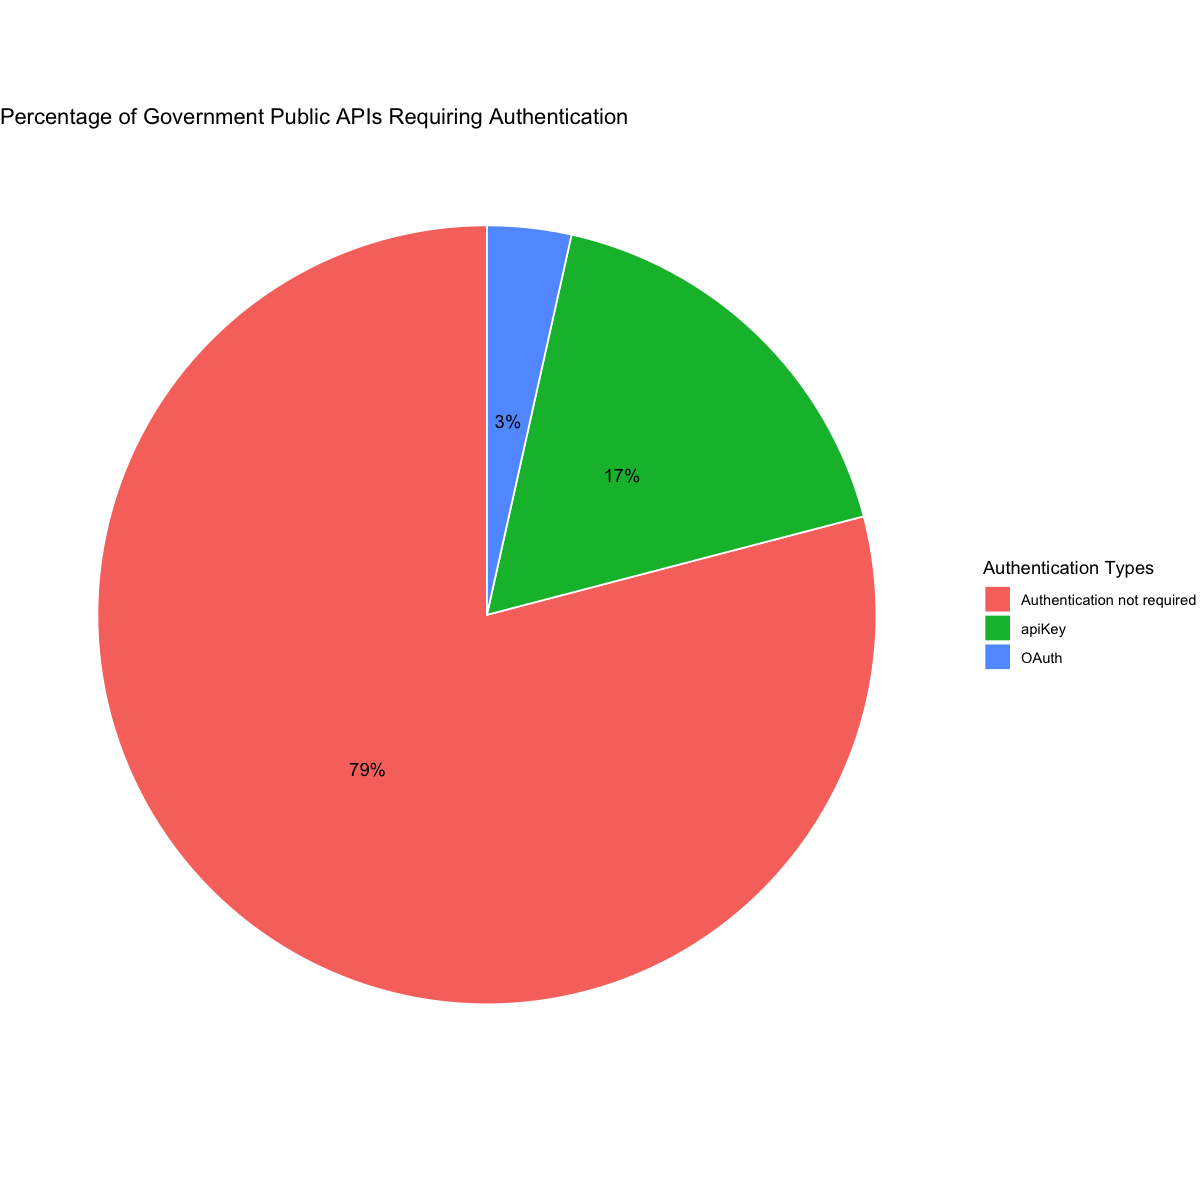

In [36]:
# A pie chart using the gov_ap data frame displaying the percentage of government public APIs requiring authentication
options(repr.plot.width = 10, repr.plot.height = 10)
gov_ap %>% 
    group_by(entries.Auth) %>% 
    summarise(Counts = n()) %>% 
    ggplot(aes(x = "", y = Counts, fill = entries.Auth)) +
    geom_bar(stat = "identity", width = 1, color = "white") +
    coord_polar("y", start = 0) +
    geom_text(aes(label = scales::percent(Counts/sum(Counts))), position = position_stack(vjust = 0.5)) +
    scale_fill_discrete(name = "Authentication Types", labels = c("Authentication not required", "apiKey", "OAuth")) +
    ggtitle("Percentage of Government Public APIs Requiring Authentication") +
    theme_void()

We created a pie chart to inform which entries in the list of government public APIs require an additional step, which is authentication, to access the resource under the endpoint.  